In [123]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle
import warnings
import lightgbm as lgb
import xgboost as xgb
from mlxtend.classifier import StackingCVClassifier
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import label_binarize

In [124]:
df = pd.read_csv("Thessaloniki_classification.csv")

In [125]:
warnings.filterwarnings("ignore")

In [126]:
df

,Gender,Driver_licence,Truck_licence,Motor_licence,Car_access,Bike_access,Skate_access,Motor_access,Hsize,Vehicles,...,Age_41 - 50,Age_51 και άνω,Income_0 - 500,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_other
0,0,0,0,0,0,0,0,0,4,3,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,3,1,...,0,0,0,0,0,1,1,0,0,0
2,1,0,0,0,0,0,0,0,3,1,...,0,0,1,0,0,0,1,0,0,0
3,1,1,0,1,1,0,0,1,4,4,...,0,0,0,0,0,1,1,0,0,0
4,0,1,0,0,1,0,0,0,3,2,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0,1,0,1,1,0,0,1,4,2,...,0,0,0,1,0,0,0,0,1,0
372,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
373,0,1,0,0,0,1,1,0,3,1,...,0,0,0,0,0,1,1,0,0,0
374,1,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,1,0,0,1,0


In [127]:
drops = ["Mode", "Car_freq", "Bus_freq", "Walk_freq"]
X = df.drop(drops, axis=1)

<Axes: >

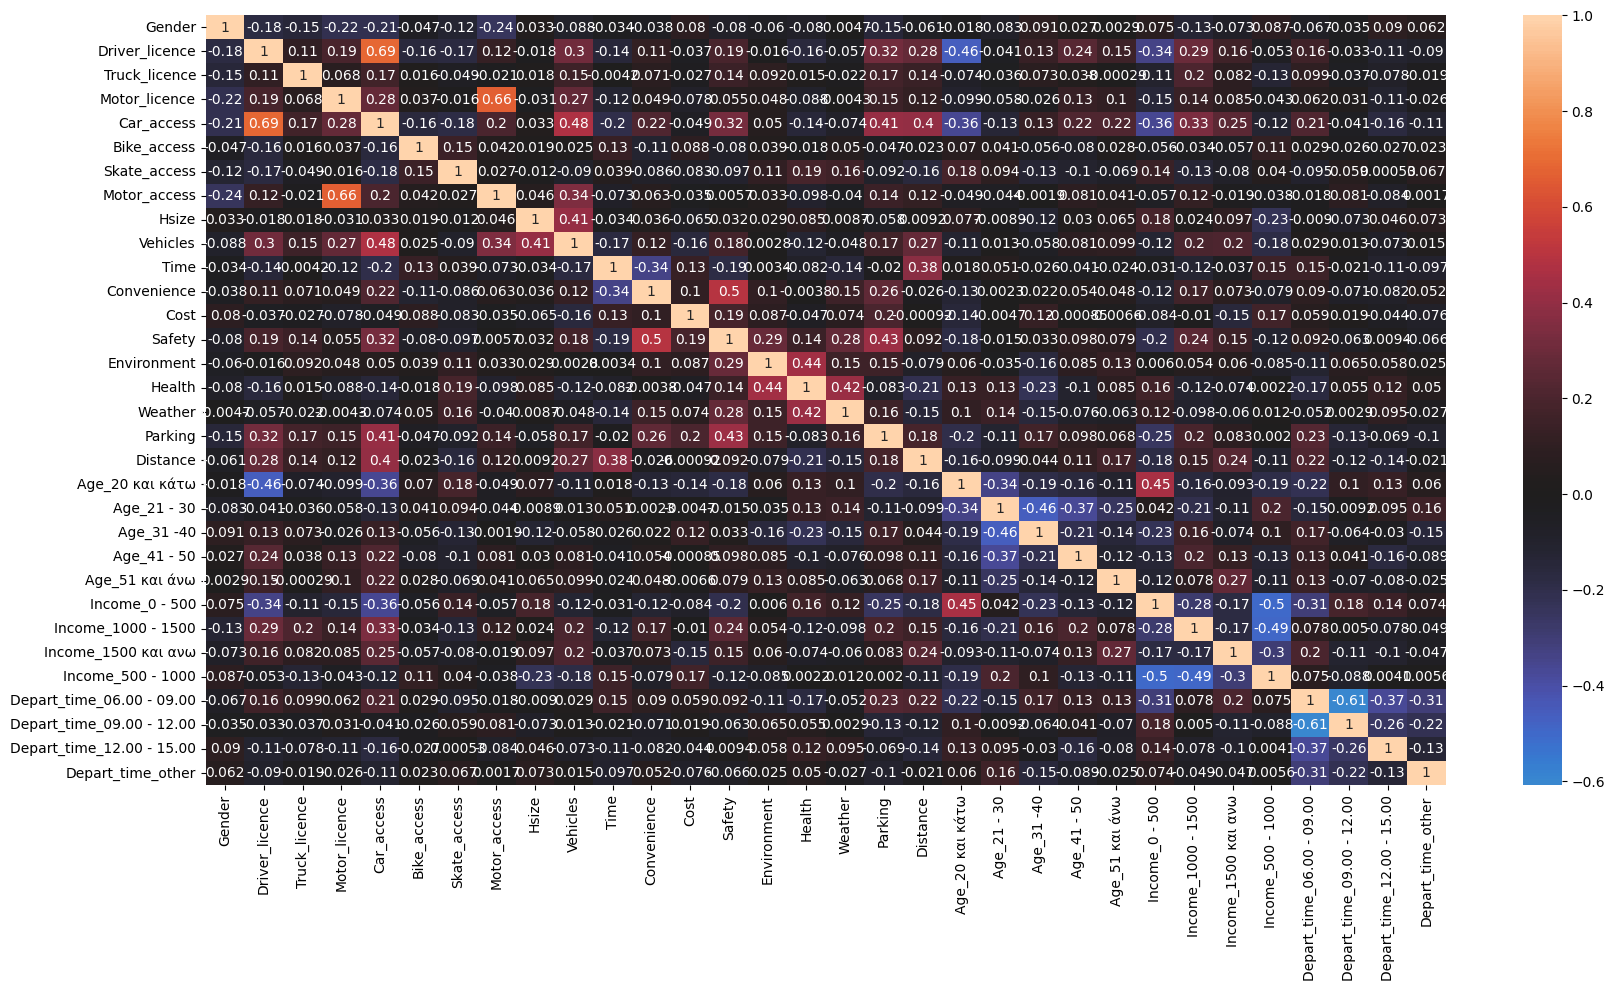

In [128]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [129]:
df.columns

Index(['Gender', 'Driver_licence', 'Truck_licence', 'Motor_licence',
       'Car_access', 'Bike_access', 'Skate_access', 'Motor_access', 'Hsize',
       'Vehicles', 'Mode', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Car_freq', 'Bus_freq',
       'Walk_freq', 'Distance', 'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40',
       'Age_41 - 50', 'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other'],
      dtype='object')

In [130]:
drops = ['Truck_licence', 'Motor_licence', 'Driver_licence',
       'Car_access', 'Motor_access', 'Skate_access', 'Bike_access',
       'Vehicles', 'Mode', 'Car_freq', 'Bus_freq',
       'Walk_freq']
X = df.drop(drops, axis=1)
y = df["Mode"]

In [131]:
X

,Gender,Hsize,Time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,...,Age_41 - 50,Age_51 και άνω,Income_0 - 500,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_other
0,0,4,60,1,3,2,4,5,3,4,...,0,0,0,0,0,1,0,1,0,0
1,0,3,40,4,4,4,2,2,2,3,...,0,0,0,0,0,1,1,0,0,0
2,1,3,35,4,5,3,2,1,4,2,...,0,0,1,0,0,0,1,0,0,0
3,1,4,6,5,3,3,3,3,5,3,...,0,0,0,0,0,1,1,0,0,0
4,0,3,46,5,5,5,2,3,5,5,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0,4,18,5,3,5,3,3,3,5,...,0,0,0,1,0,0,0,0,1,0
372,1,1,60,3,5,3,5,3,3,3,...,1,0,0,0,0,1,0,1,0,0
373,0,3,44,4,3,3,4,5,5,3,...,0,0,0,0,0,1,1,0,0,0
374,1,3,18,4,5,3,4,3,3,3,...,0,0,0,0,0,1,0,0,1,0


In [132]:
X, y = shuffle(X, y, random_state=42)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =42, stratify=y)

In [134]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    80
1    73
2    72
Name: count, dtype: int64

Class counts in y_test:
Mode
0    53
2    49
1    49
Name: count, dtype: int64


In [136]:
undersampler = RandomUnderSampler(sampling_strategy={0: 72}, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [137]:
undersampler = RandomUnderSampler(sampling_strategy={1: 72}, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [138]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    72
1    72
2    72
Name: count, dtype: int64

Class counts in y_test:
Mode
0    53
2    49
1    49
Name: count, dtype: int64


# Logistic Regression

In [139]:
log_reg=LogisticRegression(random_state=42)

In [140]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'liblinear', 'newton-cg'],
              'max_iter': [100, 200, 300, 400]}

In [141]:
grid_search_log = GridSearchCV(log_reg, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

In [142]:
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [143]:
log_params = grid_search_log.best_params_
print(log_params)

{'C': 100, 'max_iter': 100, 'solver': 'liblinear'}


In [144]:
logreg_model=LogisticRegression(C=100, max_iter=100, solver='liblinear', random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        53
           1       0.98      0.84      0.90        49
           2       0.92      0.98      0.95        49

    accuracy                           0.93       151
   macro avg       0.93      0.93      0.93       151
weighted avg       0.93      0.93      0.93       151



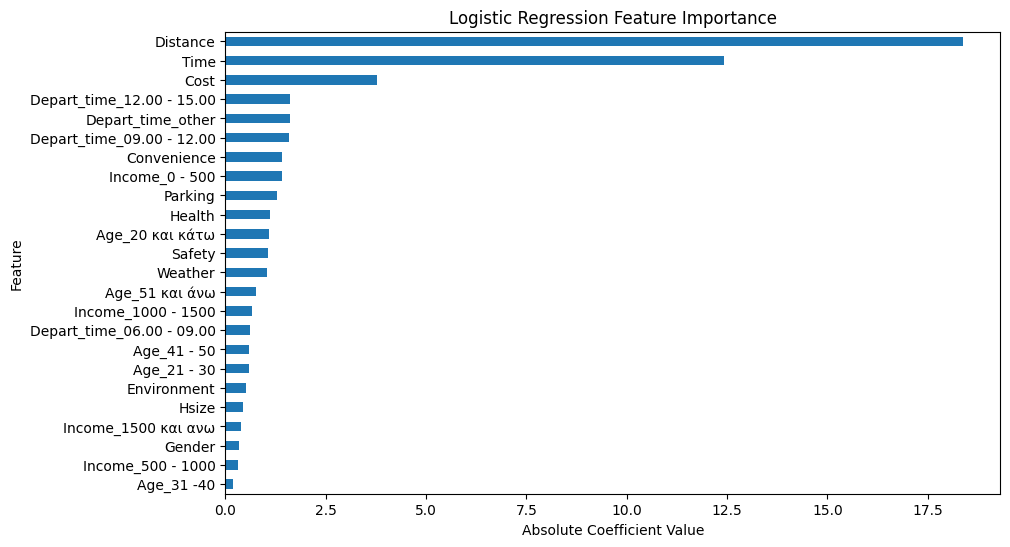

In [145]:
coefficients = pd.Series(logreg_model.coef_[0], index=X.columns)

sorted_coefficients = coefficients.abs().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sorted_coefficients.plot(kind='barh')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [146]:
print(sorted_coefficients)

Age_31 -40                    0.186915
Income_500 - 1000             0.316513
Gender                        0.350574
Income_1500 και ανω           0.390692
Hsize                         0.442790
Environment                   0.519511
Age_21 - 30                   0.584799
Age_41 - 50                   0.595669
Depart_time_06.00 - 09.00     0.624176
Income_1000 - 1500            0.658053
Age_51 και άνω                0.773717
Weather                       1.027679
Safety                        1.065860
Age_20 και κάτω               1.082657
Health                        1.122204
Parking                       1.294756
Income_0 - 500                1.406059
Convenience                   1.412376
Depart_time_09.00 - 12.00     1.580434
Depart_time_other             1.611957
Depart_time_12.00 - 15.00     1.621844
Cost                          3.791358
Time                         12.430846
Distance                     18.385486
dtype: float64


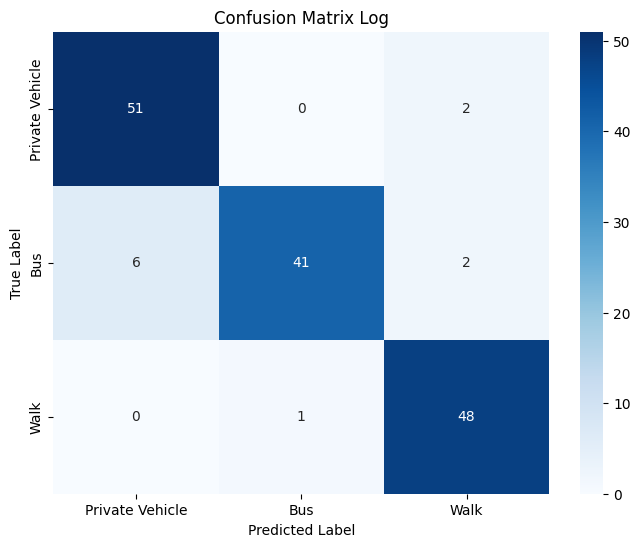

In [147]:
class_labels = ["Private Vehicle", "Bus", "Walk"]

conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Log')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Decision Tree

In [148]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
max_depth = dt_model.tree_.max_depth
max_depth

7

In [149]:
y_pred_test = dt_model.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        53
           1       0.87      0.84      0.85        49
           2       0.94      0.92      0.93        49

    accuracy                           0.90       151
   macro avg       0.90      0.90      0.90       151
weighted avg       0.90      0.90      0.90       151



In [150]:
param_grid = {
    'max_depth': list(range(2, 8))
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1, param_grid={'max_depth': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

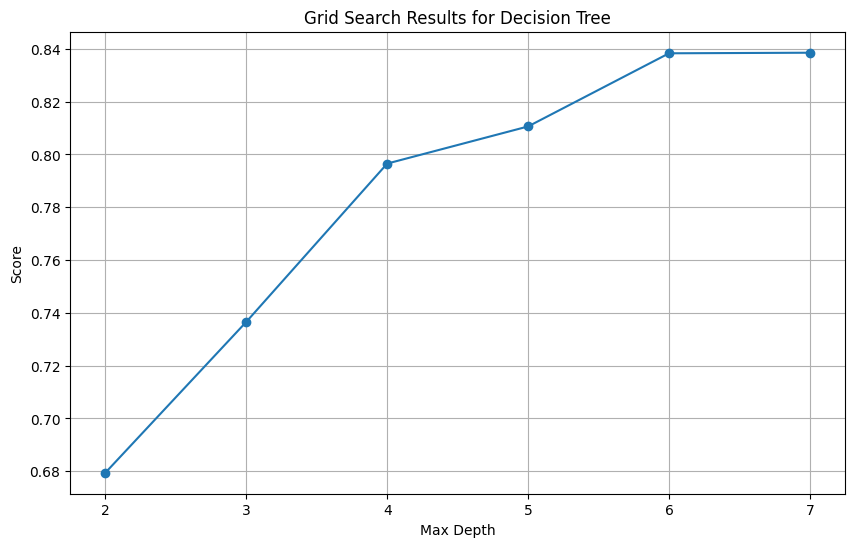

In [151]:
results = grid_search_dt.cv_results_
max_depth_values = results['param_max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [152]:
 tree = DecisionTreeClassifier(random_state = 42, max_depth=6)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        53
           1       0.87      0.84      0.85        49
           2       0.94      0.92      0.93        49

    accuracy                           0.90       151
   macro avg       0.90      0.90      0.90       151
weighted avg       0.90      0.90      0.90       151



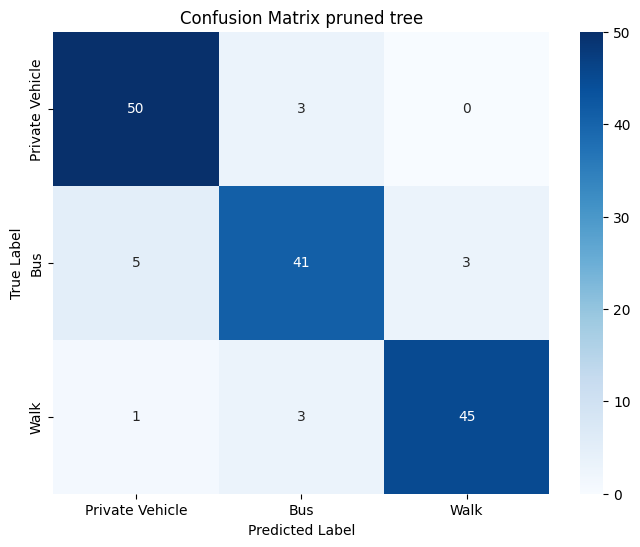

In [153]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix pruned tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [154]:
X.columns

Index(['Gender', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other'],
      dtype='object')

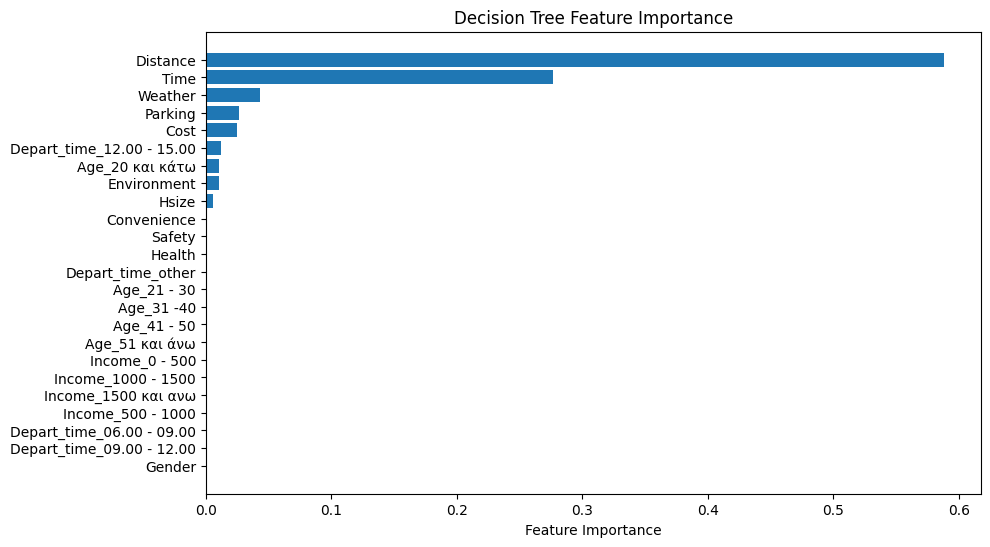

In [155]:
feature_importances = tree.feature_importances_

feature_names = ['Gender', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

# Random Forest

In [156]:
X_train.shape, X_test.shape

((216, 24), (151, 24))

In [157]:
param_grid = {
    'max_features': range(2, 25)
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 18}


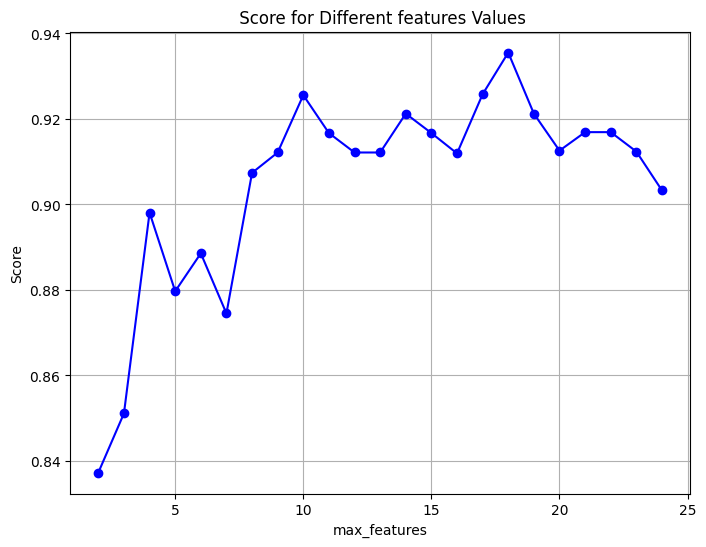

In [158]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [159]:
param_grid = {
    'n_estimators': list(range(51, 400))}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'n_estimators': 312}


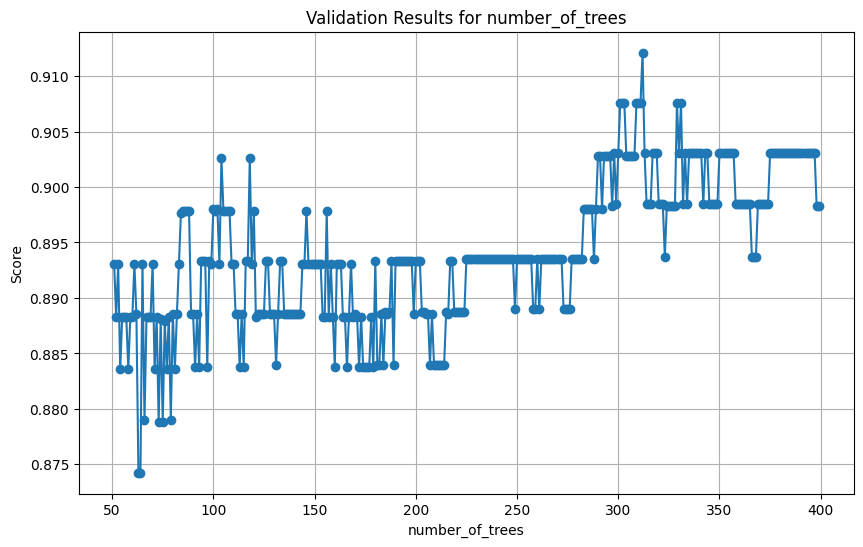

In [160]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [164]:
param_grid = {
    'n_estimators': list(range(300, 350)),
    'max_features': [18]
}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 18, 'n_estimators': 300}


In [165]:
random_forest = grid_search.best_estimator_
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.94      0.92      0.93        49
           2       0.91      0.98      0.94        49

    accuracy                           0.95       151
   macro avg       0.95      0.95      0.95       151
weighted avg       0.95      0.95      0.95       151



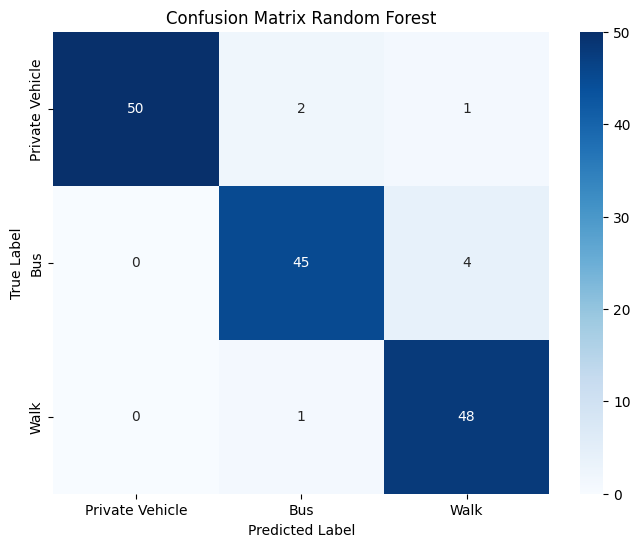

In [166]:
conf_matrix_bag = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bag, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [167]:
X.columns

Index(['Gender', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other'],
      dtype='object')

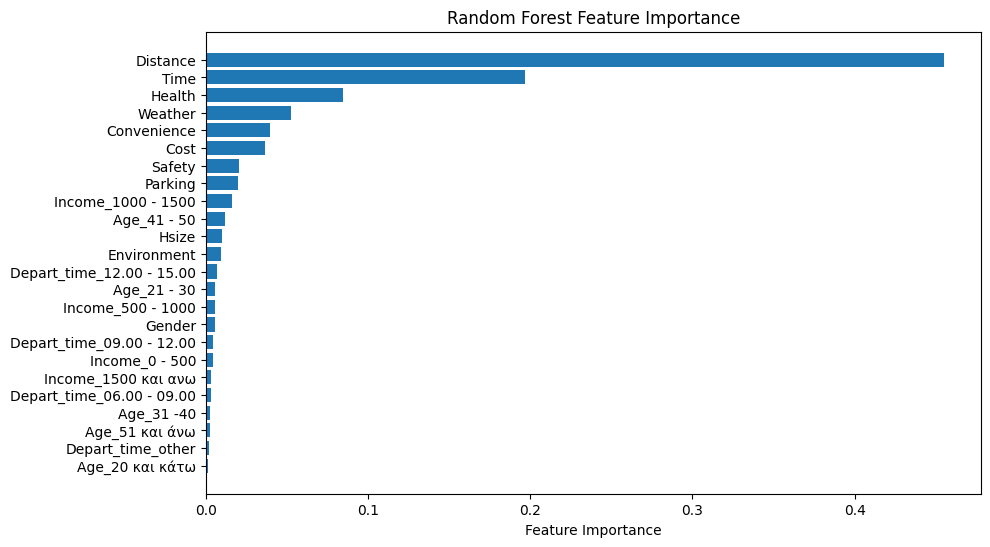

In [168]:
feature_importances = random_forest.feature_importances_

feature_names = ['Gender', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

# XGBoost

In [169]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

In [170]:
param_grid = {
    'n_estimators': list(range(50, 400)),
}

In [171]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

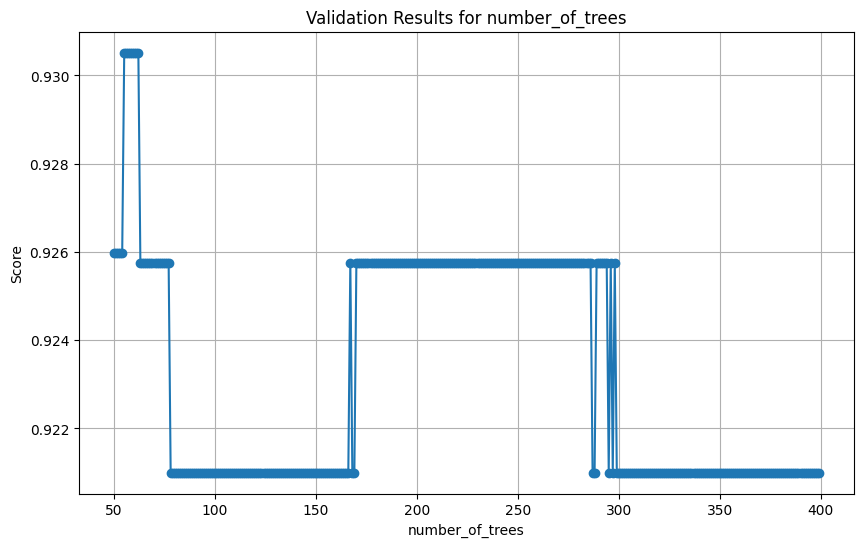

In [172]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [173]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1]}

In [174]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

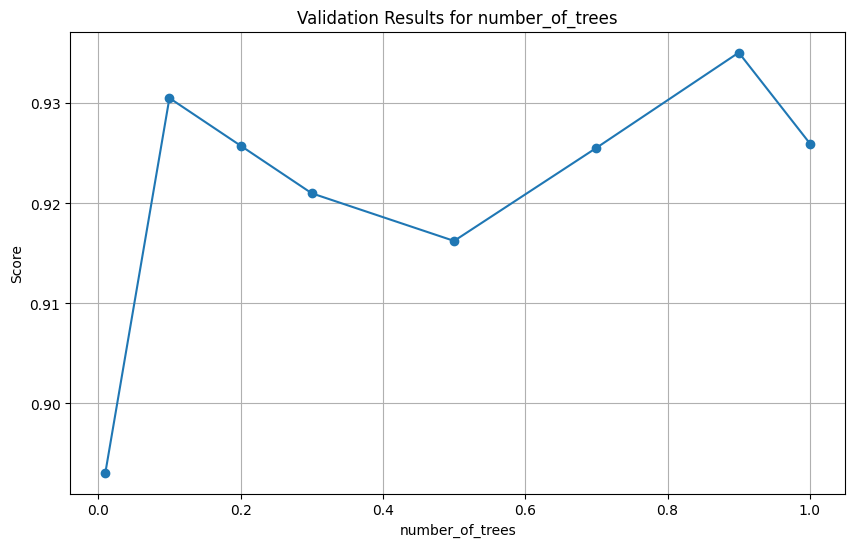

In [175]:
number_of_trees = grid_search.cv_results_['param_learning_rate']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [176]:
param_grid = {
    'n_estimators': list(range(50, 75)),
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

In [177]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.9, 'n_estimators': 55}


In [178]:
xgb_classifier = grid_search.best_estimator_

In [179]:
y_pred_test = xgb_classifier.predict(X_test)
xgbreport = classification_report(y_test, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        53
           1       0.90      0.90      0.90        49
           2       0.92      0.98      0.95        49

    accuracy                           0.93       151
   macro avg       0.93      0.93      0.93       151
weighted avg       0.93      0.93      0.93       151



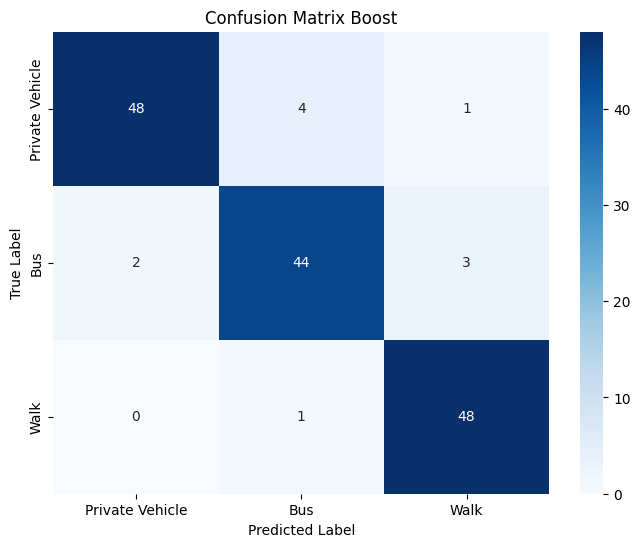

In [180]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [181]:
X.columns

Index(['Gender', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other'],
      dtype='object')

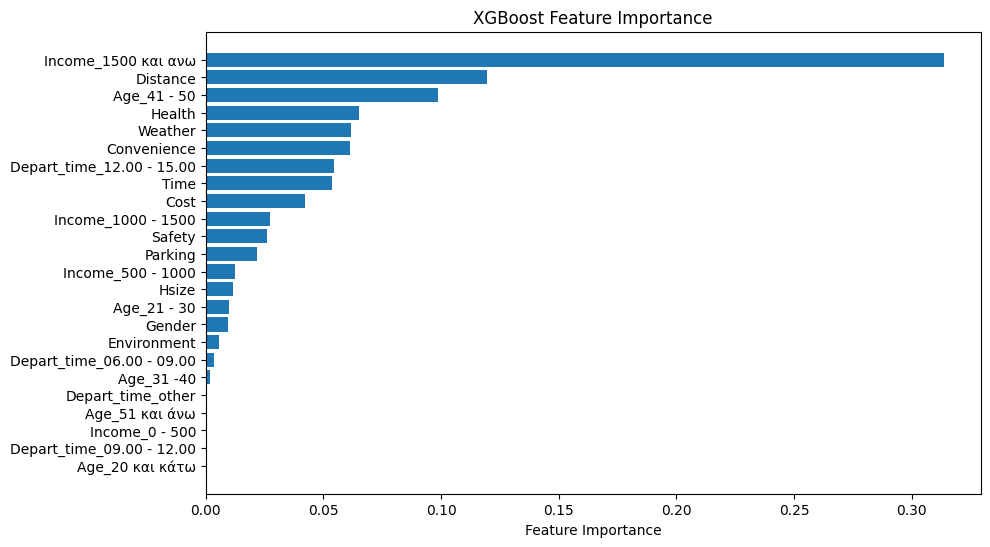

In [182]:
feature_importances = xgb_classifier.feature_importances_

feature_names = ['Gender', 'Hsize', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40', 'Age_41 - 50',
       'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

# KNN

In [183]:
knn_classifier = KNeighborsClassifier()

In [184]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}

In [185]:
grid_search = GridSearchCV(knn_classifier, param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29]},
             scoring='accuracy')

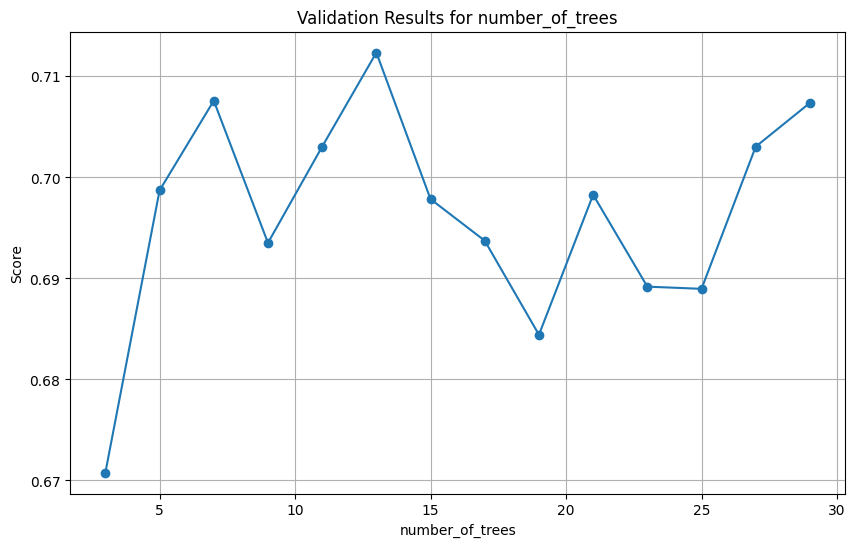

In [186]:
number_of_trees = grid_search.cv_results_['param_n_neighbors']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [187]:
best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 13}


In [188]:
knn_classifier = KNeighborsClassifier(n_neighbors=13)
knn_classifier.fit(X_train, y_train)
y_pred_test = knn_classifier.predict(X_test)
knnreport = classification_report(y_test, y_pred_test)
print(knnreport)

              precision    recall  f1-score   support

           0       0.84      0.68      0.75        53
           1       0.71      0.59      0.64        49
           2       0.61      0.84      0.71        49

    accuracy                           0.70       151
   macro avg       0.72      0.70      0.70       151
weighted avg       0.72      0.70      0.70       151



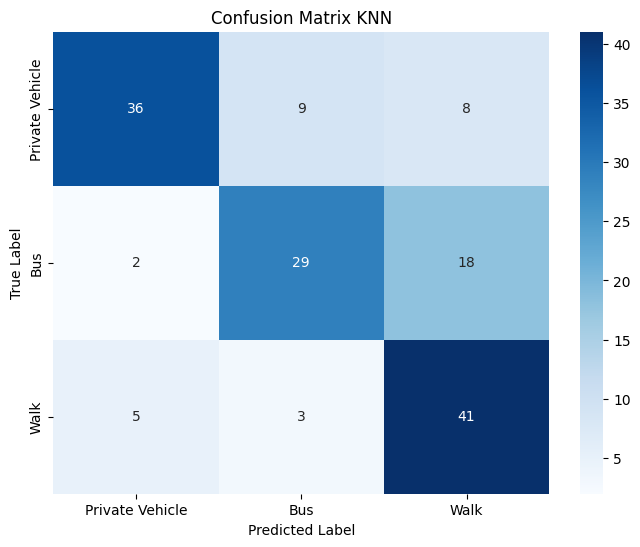

In [189]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()